In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests # requests for the report website
import json
from sec_edgar_api import EdgarClient
from bs4 import BeautifulSoup # Import BeautifulSoup
import re # import re module for REGEXes
import time
import os
import codecs
import glob


import matplotlib.pyplot as plt

In [7]:
# 读取Bloomberg overall数据
Bloom=pd.read_excel('C:/Users/lenovo/Desktop/UCL/Final dissertation/code/ESG Industrial product.xlsx')
Bloom['Ticker'] = Bloom['Ticker'].str.replace(r' \b\w{2} Equity\b', '', regex=True)
display(Bloom)

,Unnamed: 0,Ticker,Bi074,Country,2022,2021,2020,2019,2018,2017,2016,2015
0,374Water Inc,SCWO,Factory Machinery & Equipment,United States,1.14,0.7,NaN,NaN,NaN,NaN,NaN,NaN
1,3M Co,MMM,Diversified Industrials,United States,6.19,6.28,6.51,5.4,5.27,5.05,4.81,4.82
2,A O Smith Corp,AOS,Electrical Equipment,United States,2.81,3.13,3.01,3.02,2.81,2.45,1.93,1.61
3,AAON Inc,AAON,Electrical Equipment,United States,3.89,3.75,NaN,NaN,NaN,NaN,NaN,NaN
4,AAR Corp,AIR,Aircraft & Parts,United States,3.06,3.13,2.51,1.96,1.57,1.43,1.41,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...
253,Xometry Inc,XMTR,Industrial Intermediate Prod,United States,1.51,1.36,NaN,NaN,#N/A Field Not Applicable,#N/A Field Not Applicable,#N/A Field Not Applicable,#N/A Field Not Applicable
254,Xylem Inc/NY,XYL,Factory Machinery & Equipment,United States,5.94,5.54,6.2,5.72,5.5,3.79,3.45,3.46
255,Zurn Elkay Water Solutions Corp,ZWS,Factory Machinery & Equipment,United States,4.96,4.52,3.61,2.67,2.25,2.13,1.67,1.65
256,nLight Inc,LASR,Electrical Equipment,United States,2.4,2.4,2.8,1.91,1.59,NaN,NaN,NaN


In [8]:
def extract_details_from_filename(filename,path):
    filename = filename.replace(f'{path}\\','')
    parts = filename.replace('.csv', '').split('-')
    CompanyTicker = parts[0]
    Year = int(float(parts[1]))  # Convert to float first, then to int to handle any decimal points
    return CompanyTicker, Year

In [9]:
# Folder路径
folder_path = 'C:/Users/lenovo/Desktop/UCL/Final dissertation/code/filtered data'
# Use glob to get all .csv files in the folder
csv_files = glob.glob(f'{folder_path}/*.csv')
ESGOverallData = pd.DataFrame(columns=['CompanyTicker','Year','CSV.Length','ESGData','ESGLabel','BloombergOverall'])

In [10]:
# Main loop to process all CSV files
for filename in csv_files:
    try:
        # Extract company ticker and year from the filename
        CompanyTicker, Year = extract_details_from_filename(filename, folder_path)
        
        # Read the CSV file into a DataFrame
        ESGData = pd.read_csv(filename)
        # display(ESGData)
        # Initialize an empty list to store ESG scores for each row
        CSVRowESG = []
        RowLabel = []
        # Iterate over each row in the DataFrame
        for index, row in ESGData.iterrows():
            # Extract ESG scores and append to the list
            ESGN = [row['Env'], row['Soc'], row['Gov'], row['None']]
            CSVRowESG.append(ESGN)
            Max_value = max(ESGN)
            if Max_value == row['Env']:
                RowLabel.append('E')
            elif Max_value == row['Soc']:
                RowLabel.append('S')
            elif Max_value == row['Gov']:
                RowLabel.append('G')
            elif Max_value == row['None']:
                RowLabel.append('N')

        # print(len (RowLabel))
        # Filter Bloomberg data for the current company ticker
        TickerBloom = Bloom[Bloom['Ticker'] == CompanyTicker]
        
        # Extract the overall ESG score for the current year
        TickerBloomOverall = TickerBloom[Year].values[0]
        
        # Print the overall ESG score
        #print(float(TickerBloomOverall))
        
        # Append the data to the ESGOverallData DataFrame
        ESGOverallData.loc[len(ESGOverallData)] = [CompanyTicker, Year,len(ESGData), CSVRowESG,RowLabel, TickerBloomOverall]
        
    except Exception as e:
        # Print error message if there is an issue reading the file
        print(f"{CompanyTicker}-{Year}读取文件时发生错误: {e}")
        # Set the overall ESG score to 0 in case of an error
        ESGOverallData.loc[len(ESGOverallData)] = [CompanyTicker, Year,len(ESGData), CSVRowESG,RowLabel, 0]

display(ESGOverallData)

1051
63
65
62
62
62
60
60
67
294
523
71
580
298
251
264
849
40
39
58
49
55
42
42
328
368
358
401
568
650
632
22
23
629
715
470
304
522
331
23
77
76
72
71
59
831
891
764
764
826
962
353
357
41
690
711
209
191
615
50
49
825
960
853
889
774
899
108
125
68
807
387
259
931
926
941
1049
955
409
68
1419
1415
1321
1265
430
431
963
710
792
851
850
823
763
923
934
432
339
348
366
440
317
123
177
163
145
142
134
48
52
543
530
298
322
66
308
196
689
589
695
213
655
621
629
612
497
490
344
387
33
78
1061
1115
1174
999
1089
29
333
348
336
319
303
304
40
41
38
132
129
131
125
147
173
183
50
1143
1100
1171
1024
1110
239
499
283
660
871
138
87
79
312
325
833
877
86
71
78
65
97
74
22
22
511
489
501
521
495
511
22
22
204
88
293
262
946
885
626
324
915
979
413
117
62
233
230
293
72
254
469
479
826
755
782
834
827
781
1437
1102
1153
883
871
55
95
102
53
56
21
21
19
655
220
175
248
523
527
117
137
376
54
346
152
609
588
579
58
788
122
877
854
818
808
653
689
760
784
805
989
1052
1075
654
508
967
862
889
639

,CompanyTicker,Year,CSV.Length,ESGData,ESGLabel,BloombergOverall
0,AGCO,2015,1051,"[[0.0117305135354399, 0.0153213972225785, 0.01...","[N, N, N, N, N, N, N, N, N, E, N, N, N, N, N, ...",2.02
1,AGCO,2016,63,"[[0.0058001060970127, 0.0085885049775242, 0.00...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...",1.92
2,AGCO,2017,65,"[[0.0058001060970127, 0.0085885049775242, 0.00...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...",1.98
3,AGCO,2018,62,"[[0.0058001060970127, 0.0085885049775242, 0.00...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...",1.76
4,AGCO,2019,62,"[[0.0058001060970127, 0.0085885049775242, 0.00...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...",1.96
...,...,...,...,...,...,...
549,WWD,2018,815,"[[0.0021063769236207, 0.0025376905687153, 0.00...","[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...",2.69
550,WWD,2019,1602,"[[0.0020806740503758, 0.0032837667968124, 0.00...","[N, E, N, N, E, E, E, N, N, N, N, E, N, S, N, ...",2.70
551,WWD,2020,1642,"[[0.0020806740503758, 0.0032837667968124, 0.00...","[N, E, N, N, E, E, E, N, N, N, N, N, N, S, N, ...",3.32
552,WWD,2021,1076,"[[0.0020806740503758, 0.0032837667968124, 0.00...","[N, E, N, N, E, E, E, N, N, N, N, S, N, N, N, ...",2.67


In [11]:
yearly_scores = ESGOverallData.groupby('Year')['BloombergOverall'].mean().reset_index()

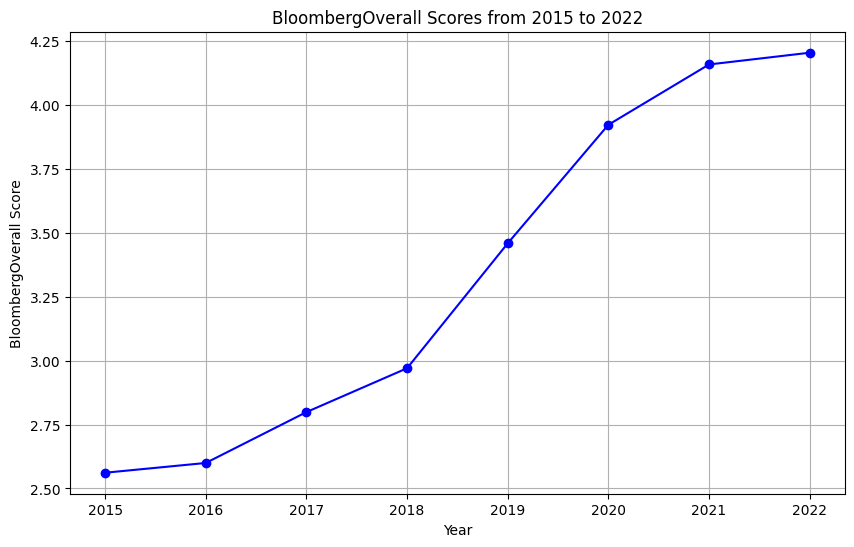

In [13]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(yearly_scores['Year'], yearly_scores['BloombergOverall'], marker='o', linestyle='-', color='b')
plt.title('BloombergOverall Scores from 2015 to 2022')
plt.xlabel('Year')
plt.ylabel('BloombergOverall Score')
plt.grid(True)
plt.xticks(yearly_scores['Year'])  # Ensure all years are shown as ticks
plt.show()

In [15]:
selected_companies = ESGOverallData['CompanyTicker'].drop_duplicates().sample(n=10, random_state=42)
selected_data = ESGOverallData[ESGOverallData['CompanyTicker'].isin(selected_companies)]

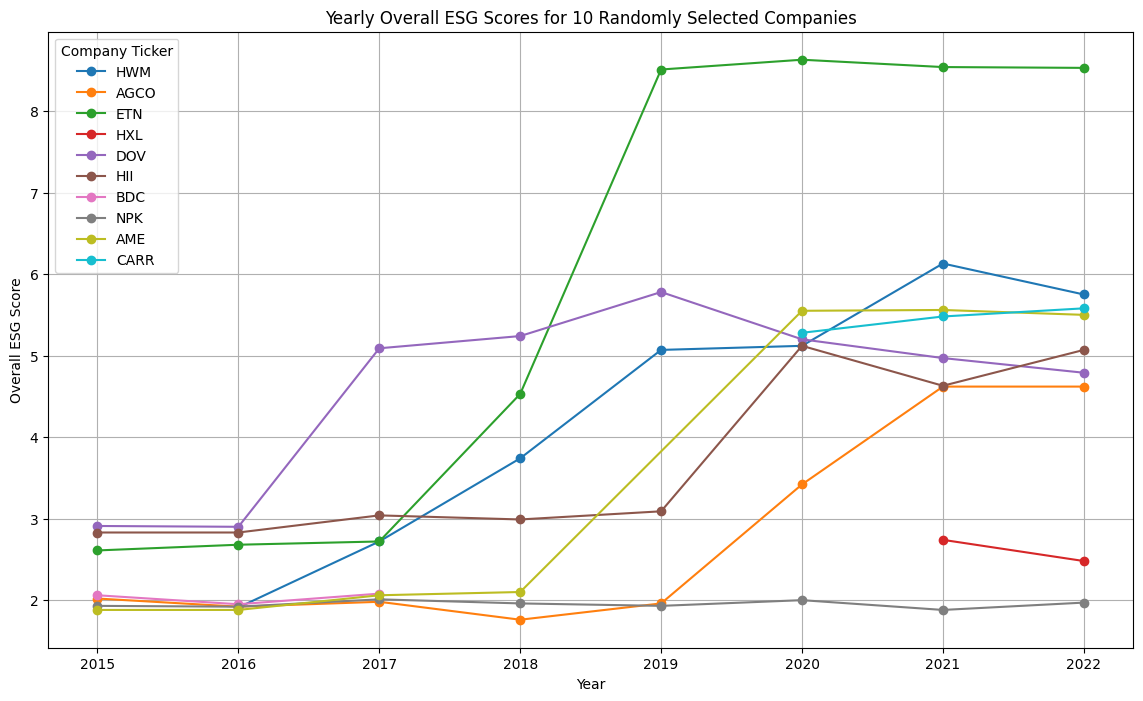

In [19]:
plt.figure(figsize=(14, 8))

for company in selected_companies:
    company_data = selected_data[selected_data['CompanyTicker'] == company]
    plt.plot(company_data['Year'], company_data['BloombergOverall'], marker='o', label=company)

# Adding title and labels
plt.title('Yearly Overall ESG Scores for 10 Randomly Selected Companies')
plt.xlabel('Year')
plt.ylabel('Overall ESG Score')
plt.legend(title='Company Ticker')
plt.grid(True)

# Show the plot
plt.show()
